In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       #  print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## To display the graphs within the code and not in another windows 
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)


# import scipy as sio
# print("Scipy Version :"+sio.__version__)
import scipy.io as sio
import os
import shutil
import random
import cv2 as cv

print("OpenCV Version : "+cv.__version__)


from PIL import Image

# To be able to use Warning
import warnings
import sklearn
print("Sklearn Version : "+sklearn.__version__)
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import catboost
print("Catboost Version : "+catboost.__version__)
from catboost import CatBoostClassifier




from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input
from keras.applications import *
from keras.applications.xception import decode_predictions
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
import tensorflow as tf
print("Keras Version : "+tf.keras.__version__)
print("Tensorflow Version : "+tf.__version__)


Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.3
Seaborn Version :0.10.0
OpenCV Version : 4.3.0
Sklearn Version : 0.23.1
Catboost Version : 0.23.2
Keras Version : 2.3.0-tf
Tensorflow Version : 2.2.0


In [23]:
images_directory = '/kaggle/input/mydogs/'
train_directory = '/kaggle/input/mydogs/train-small/'
test_directory = '/kaggle/input/mydogs/test-small/'
main_categories = [directory for directory in os.listdir(train_directory)]
main_categories.sort()
batch_size = 32

### Split among the Train / Test / Validation images

In [24]:
main_categories

['AfricanHuntingDog',
 'Basset',
 'BouvierDesFlandres',
 'Cardigan',
 'Dingo',
 'FrenchBulldog',
 'Kelpie',
 'Malinois',
 'OldEnglishSheepdog',
 'Redbone',
 'SaintBernard',
 'TibetanTerrier']

In [25]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
# train_datagen = ImageDataGenerator(
  #  rescale=1/255,
  #  rotation_range=40,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
  #  validation_split=0.2
#)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='training')

Found 1110 images belonging to 12 classes.


In [27]:
validation_generator = train_datagen.flow_from_directory(train_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='validation')

Found 272 images belonging to 12 classes.


In [28]:
test_generator = test_datagen.flow_from_directory(test_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, shuffle=False)

Found 578 images belonging to 12 classes.


In [29]:
train_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

In [30]:
test_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

In [31]:
print("In train_generator ")
for cat in range(len(train_generator.class_indices)):
    print(main_categories[cat], ":\t", list(train_generator.classes).count(cat))
print("")
print("In validation_generator ")
for cat in range(len(validation_generator.class_indices)):
    print(main_categories[cat], ":\t", list(validation_generator.classes).count(cat))
print("")
print("In test_generator ")
for cat in range(len(test_generator.class_indices)):
    print(main_categories[cat], ":\t", list(test_generator.classes).count(cat))

In train_generator 
AfricanHuntingDog :	 96
Basset :	 99
BouvierDesFlandres :	 85
Cardigan :	 88
Dingo :	 88
FrenchBulldog :	 90
Kelpie :	 87
Malinois :	 85
OldEnglishSheepdog :	 96
Redbone :	 84
SaintBernard :	 96
TibetanTerrier :	 116

In validation_generator 
AfricanHuntingDog :	 23
Basset :	 24
BouvierDesFlandres :	 21
Cardigan :	 21
Dingo :	 22
FrenchBulldog :	 22
Kelpie :	 21
Malinois :	 21
OldEnglishSheepdog :	 23
Redbone :	 21
SaintBernard :	 24
TibetanTerrier :	 29

In test_generator 
AfricanHuntingDog :	 50
Basset :	 52
BouvierDesFlandres :	 44
Cardigan :	 46
Dingo :	 46
FrenchBulldog :	 47
Kelpie :	 45
Malinois :	 44
OldEnglishSheepdog :	 50
Redbone :	 43
SaintBernard :	 50
TibetanTerrier :	 61


# Definition of the model

In [32]:
# model = Sequential()
# model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(224,224,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(150))
#model.add(Activation('relu'))
# model.add(Dropout(0.4))

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size =(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters =  32, kernel_size =(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64,kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 128, kernel_size =(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 256, kernel_size =(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters = 16, kernel_size = 2, input_shape=(224, 224, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters =  32, kernel_size = 2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters = 64,kernel_size = 2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters = 128, kernel_size = 2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters = 256, kernel_size = 2, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))


model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dense(len(main_categories),activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)      

In [33]:
train_generator.reset()
validation_generator.reset()
# model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [34]:
earlystopping = EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 

In [35]:
model_info = model.fit_generator(train_generator, validation_data=validation_generator, epochs=30, verbose=2, callbacks =[earlystopping])

Epoch 1/30
35/35 - 6s - loss: 2.4829 - accuracy: 0.0883 - val_loss: 2.4733 - val_accuracy: 0.1066
Epoch 2/30
35/35 - 6s - loss: 2.4708 - accuracy: 0.1018 - val_loss: 2.4540 - val_accuracy: 0.1140
Epoch 3/30
35/35 - 6s - loss: 2.4259 - accuracy: 0.1297 - val_loss: 2.3982 - val_accuracy: 0.1397
Epoch 4/30
35/35 - 6s - loss: 2.3339 - accuracy: 0.2009 - val_loss: 2.2633 - val_accuracy: 0.2353
Epoch 5/30
35/35 - 6s - loss: 2.1662 - accuracy: 0.2622 - val_loss: 2.1960 - val_accuracy: 0.2426
Epoch 6/30
35/35 - 6s - loss: 2.0138 - accuracy: 0.3243 - val_loss: 2.1211 - val_accuracy: 0.2794
Epoch 7/30
35/35 - 6s - loss: 1.9401 - accuracy: 0.3396 - val_loss: 2.1521 - val_accuracy: 0.2537
Epoch 8/30
35/35 - 6s - loss: 1.8470 - accuracy: 0.3748 - val_loss: 2.1424 - val_accuracy: 0.2757
Epoch 9/30
35/35 - 6s - loss: 1.7683 - accuracy: 0.4000 - val_loss: 2.1028 - val_accuracy: 0.2904
Epoch 10/30
35/35 - 6s - loss: 1.6766 - accuracy: 0.4342 - val_loss: 2.1099 - val_accuracy: 0.3309
Epoch 11/30
35/35 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


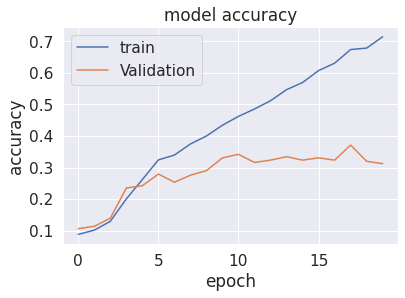

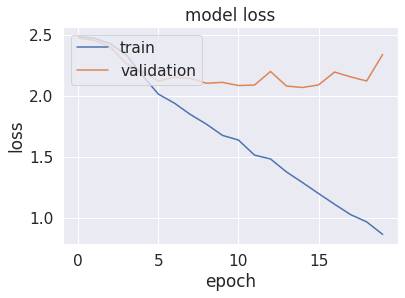

In [36]:
# list all data in history
print(model_info.history.keys())
# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
validation_generator.reset()
score = model.evaluate_generator(validation_generator, (validation_generator.samples + (batch_size - 1)) // batch_size)
print("For validation data set; Loss: ", score[0], " Accuracy: ", score[1])

For validation data set; Loss:  2.0682201385498047  Accuracy:  0.3235294222831726


In [38]:
test_generator.reset()
score = model.evaluate_generator(test_generator, (test_generator.samples + (batch_size-1)) // batch_size)
print("For test data set; Loss: ",score[0]," Accuracy: ", score[1])

For test data set; Loss:  2.1263959407806396  Accuracy:  0.34775087237358093


In [39]:
test_generator.reset()

testStep = (test_generator.samples + (batch_size-1)) // batch_size
print("testStep: ", testStep)

testStep:  19


In [40]:
Y_pred = model.predict_generator(test_generator, steps=testStep, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print(str(len(y_pred)))
labels = (validation_generator.class_indices)
print("Labels "+(str)(labels))
labels = dict((v, k) for k, v in labels.items())
print(labels)
predictedLabels = [labels[k] for k in y_pred]
print("Predicted Labels "+(str)(predictedLabels))
len(predictedLabels)
actualLabels = [labels[k] for k in test_generator.classes]
print("Actual Labels "+(str)(actualLabels))
len(actualLabels)


19/19 - 2s
[ 0  2  0  0  0  0  0  0  0  4  0  5  1  0  0  4  3  7  0  0  7  0  6  6
  6  1  0  0  0  0  4  4  0  0  0  0  0  0  9  0  5  0  0  0  0  9  9  0
  0  0  4  3  1  1  0  4  1  3  1  0  3 10  1  3  1  3  1  1  3  6 10  4
  1  2  9  9 10 10  7  7  6  0 11  3 10  1  6  1  9  1  2  1  0  2  1  9
  3  9  1  1  1 10  2  0  2 11  2  2  2  2  2  0 11  2  0 11  2  6  6 11
  7  2  2  2  6  9  0 11  8  0  1  2  5  2 11  2  5  3  6  0  2  9  2  6
 11  2  0  4  9  3  3  2  3  0  4  0  4  1  3  3 10  7  1 10  0  9 11  3
  9  3  1  3  4  6  3  3  0  3 10  0  3  1 10  9  8  3  1 10  3 10 10 11
  4  9  4  7  6  4  4  4  4  4  9  0  9  4  0 10  4  4  4  4  4  5  4  4
  1  0  4  8  4  4  4  4  4  4  9  4  4  0  4  4  4  4  4  4  4  0 10  8
  6 10  3  2  3  8 11  8  7  3  0 10  8  5  4  2  1  6  6  2  4  4 10  1
  3 10  4  4  9  2  4  6  3  8  9  6  8 10 10  6  8  5  1  3  4  5  6 11
  7  6  0  4  6  3  6  5 11  4  3  5  6  6  6  3  9  6  6  6  6  0  4  0
  5  2  9  9  9  2  2  5 11  8  3  4  3 

578

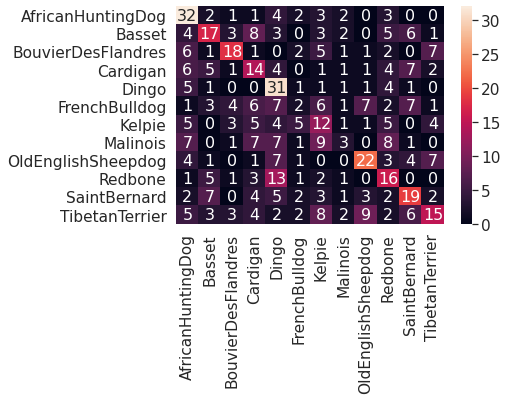

In [41]:
df_cm = pd.DataFrame(confusion_matrix(actualLabels, predictedLabels), main_categories, main_categories)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [42]:
print(classification_report(actualLabels, predictedLabels))

                    precision    recall  f1-score   support

 AfricanHuntingDog       0.41      0.64      0.50        50
            Basset       0.38      0.33      0.35        52
BouvierDesFlandres       0.51      0.41      0.46        44
          Cardigan       0.26      0.30      0.28        46
             Dingo       0.36      0.67      0.47        46
     FrenchBulldog       0.11      0.04      0.06        47
            Kelpie       0.23      0.27      0.24        45
          Malinois       0.19      0.07      0.10        44
OldEnglishSheepdog       0.49      0.44      0.46        50
           Redbone       0.29      0.37      0.32        43
      SaintBernard       0.37      0.38      0.38        50
    TibetanTerrier       0.38      0.25      0.30        61

          accuracy                           0.35       578
         macro avg       0.33      0.35      0.33       578
      weighted avg       0.33      0.35      0.33       578

